# Queueing System

In [7]:
%matplotlib inline
from pylab import *

In [2]:
import pandas as pd
import numpy as np

In [8]:
class Service_System:
    def __init__(self): 
        self.clock=0.0                      #simulation clock
        self.num_arrivals=0                 #total number of arrivals
        self.t_arrival=self.gen_int_arr()   #time of next arrival
        self.t_departure1=float('inf')      #departure time from server 1
        self.t_departure2=float('inf')      #departure time from server 2
        self.t_departure3=float('inf')      #departure time from server 3
        self.t_departure4=float('inf')      #departure time from server 4
        self.t_departure5=float('inf')      #departure time from server 5
        self.dep_sum1=0                     #Sum of service times by server 1
        self.dep_sum2=0                     #Sum of service times by server 2
        self.dep_sum3=0                     #Sum of service times by server 3
        self.dep_sum4=0                     #Sum of service times by server 4
        self.dep_sum5=0                     #Sum of service times by server 5
        self.state_T1=0                     #current state of server1 (binary)
        self.state_T2=0                     #current state of server2 (binary)
        self.state_T3=0                     #current state of server3 (binary)
        self.state_T4=0                     #current state of server4 (binary)
        self.state_T5=0                     #current state of server5 (binary)
        self.total_wait_time=0.0            #total wait time
        self.num_in_q=0                     #current number in queue
        self.number_in_queue=0              #customers who had to wait in line(counter)
        self.num_of_departures1=0           #number of customers served by server 1  
        self.num_of_departures2=0           #number of customers served by server 2 
        self.num_of_departures3=0           #number of customers served by server 3
        self.num_of_departures4=0           #number of customers served by server 4
        self.num_of_departures5=0           #number of customers served by server 5
        self.lost_customers=0               #customers who left without service

In [9]:
# Time Routing
def time_adv(self):                                                       
        t_next_event=min(self.t_arrival,self.t_departure1,self.t_departure2,self.t_departure3,self.t_departure4,self.t_departure5)  
        self.total_wait_time += (self.num_in_q*(t_next_event-self.clock))
        self.clock=t_next_event
                
        if self.t_arrival<self.t_departure1 and self.t_arrival<self.t_departure2:
            self.arrival()
        elif self.t_departure1<self.t_arrival and self.t_departure1<self.t_departure2:
            self.teller2()
        elif self.t_departure2<self.t_arrival and self.t_departure2<self.t_departure3:
            self.teller3()
        elif self.t_departure3<self.t_arrival and self.t_departure3<self.t_departure4:
            self.teller4()
        else:
            self.teller5()

In [10]:
def arrival(self):              
        self.num_arrivals += 1
        self.num_in_system += 1

        if self.num_in_q == 0:                #schedule next departure or arrival depending on state of servers
 
    # Checking the status fo servers for servers

            if self.state_T1==1 and self.state_T2==1 and self.state_T3==1 and self.state_T4==1 and self.state_T5==1:
                self.num_in_q+=1
                self.number_in_queue+=1
                self.t_arrival=self.clock+self.gen_int_arr()
                
                
            elif self.state_T1==0 and self.state_T2==0 and self.state_T3==0 and self.state_T4==0 and self.state_T5==0:
                
                if np.random.choice([0,1])==1:
                    self.state_T1=1
                    self.dep1= self.gen_service_time_teller1()
                    self.dep_sum1 += self.dep1
                    self.t_departure1=self.clock + self.dep1
                    self.t_arrival=self.clock+self.gen_int_arr()
                elif np.random.choice([0,1])==1:
                    self.state_T2=1
                    self.dep2= self.gen_service_time_teller2()
                    self.dep_sum2 += self.dep2
                    self.t_departure2=self.clock + self.dep2
                    self.t_arrival=self.clock+self.gen_int_arr()
                elif np.random.choice([0,1])==1:
                    self.state_T3=1
                    self.dep3= self.gen_service_time_teller3()
                    self.dep_sum3 += self.dep3
                    self.t_departure3=self.clock + self.dep3
                    self.t_arrival=self.clock+self.gen_int_arr()
                elif np.random.choice([0,1])==1:
                    self.state_T4=1
                    self.dep4= self.gen_service_time_teller4()
                    self.dep_sum4 += self.dep4
                    self.t_departure4=self.clock + self.dep4
                    self.t_arrival=self.clock+self.gen_int_arr()

                else:
                    self.state_T5=1
                    self.dep5= self.gen_service_time_teller5()
                    self.dep_sum5 += self.dep5
                    self.t_departure5=self.clock + self.dep5
                    self.t_arrival=self.clock+self.gen_int_arr()
                
                
                    
                    

                    
            if self.state_T1==0 and self.state_T2 ==1:       #if server 2 is busy customer goes to server 1
                self.dep1= self.gen_service_time_teller1()
                self.dep_sum1 += self.dep1
                self.t_departure1=self.clock + self.dep1
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T1=1
          
                
            elif self.state_T2==0 and self.state_T3 ==1:       #if server 3 is busy customer goes to server 2
                self.dep2= self.gen_service_time_teller2()
                self.dep_sum2 += self.dep2
                self.t_departure2=self.clock + self.dep2
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T2=1
               
            elif self.state_T3==0 and self.state_T4 ==1:       #if server 4 is busy customer goes to server 3
                self.dep3= self.gen_service_time_teller3()
                self.dep_sum3 += self.dep3
                self.t_departure3=self.clock + self.dep3
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T3=1
             
            elif self.state_T4==0 and self.state_T5 ==1:       #if server 5 is busy customer goes to server 4
                self.dep4= self.gen_service_time_teller4()
                self.dep_sum4 += self.dep4
                self.t_departure4=self.clock + self.dep4
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T4=1
            else:                                              #otherwise customer goes to server 5
                self.dep5= self.gen_service_time_teller5()
                self.dep_sum5 += self.dep5
                self.t_departure5=self.clock + self.dep5
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T5=1
        else:
            self.lost_customers+=1  # Customer is lost in all other cases
 

In [11]:
def server1(self):                #departure from server 1
        self.num_of_departures1 += 1
        if self.num_in_q>0:
            self.dep1= self.gen_service_time_teller1()
            self.dep_sum1 += self.dep1
            self.t_departure1=self.clock + self.dep1
            self.num_in_q-=1
        else:
            self.t_departure1=float('inf') 
            self.state_T1=0                  
    
def server2(self):                #departure from server 2
        self.num_of_departures2 += 1
        if self.num_in_q>0:
            self.dep2= self.gen_service_time_teller2()
            self.dep_sum2 += self.dep2
            self.t_departure2=self.clock + self.dep2
            self.num_in_q-=1
        else:
            self.t_departure2=float('inf')
            self.state_T2=0
            
def server3(self):                #departure from server 3
        self.num_of_departures3 += 1
        if self.num_in_q>0:
            self.dep3= self.gen_service_time_teller3()
            self.dep_sum3 += self.dep3
            self.t_departure3=self.clock + self.dep3
            self.num_in_q-=1
        else:
            self.t_departure3=float('inf')
            self.state_T3=0
            
def server4(self):                #departure from server 4
        self.num_of_departures4 += 1
        if self.num_in_q>0:
            self.dep4= self.gen_service_time_teller4()
            self.dep_sum4 += self.dep4
            self.t_departure4=self.clock + self.dep4
            self.num_in_q-=1
        else:
            self.t_departure4=float('inf')
            self.state_T4=0
            
def server5(self):                #departure from server 5
        self.num_of_departures5 += 1
        if self.num_in_q>0:
            self.dep5= self.gen_service_time_teller5()
            self.dep_sum5 += self.dep5
            self.t_departure5=self.clock + self.dep5
            self.num_in_q-=1
        else:
            self.t_departure5=float('inf')
            self.state_T5=0
    

In [12]:
def gen_int_arr(self):                                             #function to generate arrival times using inverse trnasform
    
    return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 3)
    
def gen_service_time_server1(self):                                #function to generate service time for server 1 using inverse trnasform
    return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.2)
    
def gen_service_time_server2(self):                                #function to generate service time for server 2 using inverse trnasform
    return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.5)
    
def gen_service_time_server1(self):                                #function to generate service time for server 3 using inverse trnasform
    return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.2)
    
def gen_service_time_server1(self):                                #function to generate service time for server 4 using inverse trnasform
    return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.2)
    
def gen_service_time_server1(self):                                #function to generate service time for server 5 using inverse trnasform
    return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.2)

In [13]:
# actual simulation
s=Service_System()
df=pd.DataFrame(columns=['Average interarrival time','Average service time server 1','Average service time server 2','Average service time server 3','Average service time server 4','Average service time server 5','Utilization server 1','Utilization server 2','Utilization server 3','Utilization server 4','Utilization server 5','People who had to wait in line','Total average wait time','Lost Customers'])


for i in range(100):
    np.random.seed(i)
    s.__init__()
    while s.clock <= 480 :
        s.time_adv() 
    a=pd.Series([s.clock/s.num_arrivals,s.dep_sum1/s.num_of_departures1,s.dep_sum2/s.num_of_departures2,s.dep_sum3/s.num_of_departures3,s.dep_sum4/s.num_of_departures4,s.dep_sum5/s.num_of_departures5,s.dep_sum1/s.clock,s.dep_sum2/s.clock,s.dep_sum3/s.clock,s.dep_sum4/s.clock,s.dep_sum5/s.clock,s.number_in_queue,s.total_wait_time,s.lost_customers],index=df.columns)
    df=df.append(a,ignore_index=True)
df.to_excel('results.xlsx') 

AttributeError: 'Service_System' object has no attribute 'gen_int_arr'

### I have figured out that this error will occur if we have multiple functions in classes. I couldn't find the solution. Hopefully this might work in your system

### As I was getting an error at the previous step hence I couldn't submit my excel file!!! "But the logic is very accurate. Please try this entire code in your system".

# Generating M/M/C system with simple code

In [14]:
# Specify the service intensity, where N is the number 
# of users in the system and C the number of servers
def service_intensity(μ,n,c):
    # returns the service intensity
    return μ * min(n, c)
######################################################
C,λ,μ,N0 = 5,0.65,0.25,2  
V1 = service_intensity(μ,N0,C)

In [15]:
V1

0.5

In [37]:
def MMC(C,λ,μ,N0,Tmax):
    T             = [0]  # list of instants of events
    N             = [N0] # initial state of the system
    # arrival times of clients in the system,
    # arbitrarily set to -1 for clients present at t=0
    arrival_times = [-1 for k in range(N0)] 
    D             = [] # times spent by users inside the system
    while T[-1]<Tmax:
        ##########################################
        # Complete the code
        μ_state  = service_intensity(μ, N[-1], C) # current service intensity
        
        # if empty, we can only have an arrival
        if N[-1]==0:
            # inter-events delay for empty buffer:
            τ     = -1./λ*log(rand()) 
            event = 1
            
        # if not empty, we can have an arrival or a departure
        else:
            # inter-events delay for non-empty buffer:
            τ     = -1./(λ + μ_state)*log(rand()) 
            p_arrival = λ / (λ + μ_state)
            # event =+1 for an arrival, =-1 for a departure:
            event = 2*(rand()<p_arrival)-1 # +1 for an arrival, -1 for a departure
        
        N.append(N[-1]+event)
        T.append(T[-1]+τ)
        
        if event == 1:
            arrival_times.append(T[-1])
        else:
            # entry time of client going out the system:
            T_in = arrival_times.pop(0)
            if T_in>0:
                D.append(T[-1] - T_in)
        ############################################        
    T  = T[:-1] # event after Tmax is discarded
    N  = N[:-1]
    return T,N,D

In [18]:
T,N,D = MMC(5, 0.65, 0.25, 2, Tmax=1000)
#----
V2 = mean(D)
print(V2)

0
1000
4.462846401574145


In [38]:
T,N,D = MMC(5, 0.75, 0.25, 2, Tmax=1000)
#----
V3 = mean(D)
print(V3)

4.809634986843163


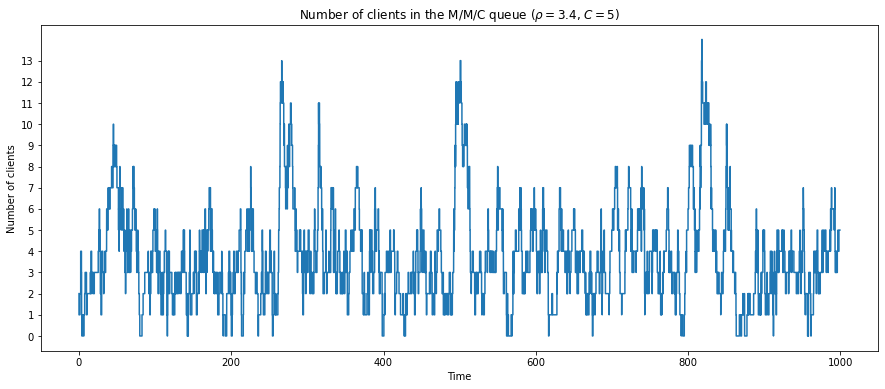

In [36]:
# Plotting the number of clients in the system
T,N,D = MMC(5,0.85, 0.25,2, 1000)
figure(figsize=(15,6))
step(T,N)
xlabel('Time')
ylabel('Number of clients')
title('Number of clients in the M/M/C queue' 
      +r' ($\rho =%g$, $C=%g$)'%(3.4,C))
yticks(range(max(N)), range(max(N)));

# This is another method to find the number of customers in the system.

In [22]:
# This is the simple code to find the loss using finite capacity

num = 1000
np.random.seed(3)

a = np.random.randint(0,25, size= num)
c = 5*np.ones(num)
L = np.zeros_like(a)  # queue length at the end of period
loss = np.zeros_like(a) # loss at the end of period
K = 15  # Max people in queue, otherwise they leave.
L[0] = 2

for i in range(1, num):
    
    d = min(c[i], L[i-1] + a[i])
    loss[i] = max(L[i-1] + a[i] - d- K, 0 )
    L[i] = L[i-1] + a[i] - d - loss[i]

lost_fraction = sum(loss)/ sum(a)
print(lost_fraction)
print(np.mean(L))

0.5913347992507533
14.054


## "I have simulated the system using different methods. However, I couldn't use multiple classes to find the over flow cost and finish the project."